# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (
    OrdinalEncoder, 
    OneHotEncoder, 
    StandardScaler, 
    MinMaxScaler
)
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import sys

lib_path = os.path.abspath('../../../lib')
sys.path.append(lib_path)

from easy_keras import KerasMLPClassifier, make_confusion_matrix

In [3]:
seed = 12345

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# 2. Read Data

In [4]:
data = pd.read_csv('../image_to_csv/alzheimer_dataset.csv')

data

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_36599,pixel_36600,pixel_36601,pixel_36602,pixel_36603,pixel_36604,pixel_36605,pixel_36606,pixel_36607,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# 3. Clean Data

## 3.1. Handle Missing Values

### 3.1.1. Check Missing Values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5121 entries, 0 to 5120
Columns: 36609 entries, pixel_0 to label
dtypes: float64(36609)
memory usage: 1.4 GB


### 3.1.2. Remove Missing Values

In [6]:
# no NaN to remove
# data.dropna(axis=0, inplace=True)

## 3.2. Handle Outliers

### 3.2.1. Check Outliers

In [7]:
data.describe()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_36599,pixel_36600,pixel_36601,pixel_36602,pixel_36603,pixel_36604,pixel_36605,pixel_36606,pixel_36607,label
count,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,...,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.0,5121.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500098
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500049
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


### 3.2.2. Remove Outliers

In [8]:
# no outlier to remove

# 4. Split Dataset into Training & Test Sets

In [9]:
target_name = 'label'
feature_name = list(data.columns.drop(target_name))

In [10]:
X = data[feature_name]
y = data[target_name]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True)

# 5. Data Preparation

## ### 5.1. Ordinal Encoding

## ### 5.2. One Hot Encoding

## 5.3. Feature Scaling

### 5.3.1. Training Set

In [12]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

### 5.3.2. Test Set

In [13]:
X_test_scaled = scaler.transform(X_test)

# 6. Model Creation

## 6.1. Setting Parameters

In [14]:
classes = np.unique(y_train)

In [15]:
clf = KerasMLPClassifier(
    input_dim=X_train_scaled.shape[1],
    hidden_layer_sizes=(50, 10, 10),
    activation_function='relu',
    classes=classes,
    learning_rate_init=0.00015,
    epochs=100,
    validation_split=0.1,
    use_gpu=True,
    class_weight='balanced',
    l1_lambda=0.0,
    l2_lambda=0.001,
    dropout_rate=[0, 0, 0],
    solver='adam',
    batch_size=64
)

## 6.2. Train Model

In [16]:
clf.fit(X_train_scaled, y_train)

Training:   0%|           0/100 ETA: ?s,  ?epochs/s

{'loss': [0.7278040051460266,
  0.6268577575683594,
  0.5847988128662109,
  0.5504645109176636,
  0.5200855135917664,
  0.4789176285266876,
  0.4450821578502655,
  0.41784629225730896,
  0.39921480417251587,
  0.40194928646087646,
  0.4279266893863678,
  0.3451499044895172,
  0.32464930415153503,
  0.3141319453716278,
  0.30141210556030273,
  0.2987886071205139,
  0.2713594138622284,
  0.27101433277130127,
  0.24895234405994415,
  0.2562893331050873,
  0.23036983609199524,
  0.23185211420059204,
  0.20857800543308258,
  0.220821350812912,
  0.2020980715751648,
  0.19347642362117767,
  0.19069898128509521,
  0.17107082903385162,
  0.16876956820487976,
  0.1624596267938614,
  0.15938498079776764,
  0.15372730791568756,
  0.16500061750411987,
  0.15270651876926422,
  0.1516321450471878,
  0.13734039664268494,
  0.13093505799770355,
  0.129609614610672,
  0.12174345552921295,
  0.14161284267902374,
  0.11128626018762589,
  0.12395114451646805,
  0.10423972457647324,
  0.10192131996154785,


## 6.3. Loss Curve

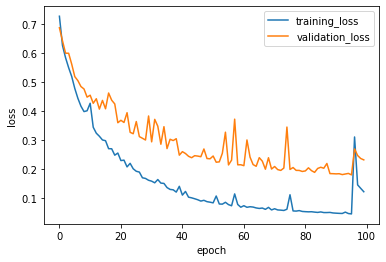

In [17]:
plt.plot(clf.loss_curve_, label='training_loss')
plt.plot(clf.val_loss_curve_, label='validation_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

## 6.4. Model's Weight & Bias

In [18]:
for coef_ in clf.coefs_:
    print(coef_.shape)

(36608, 50)
(50, 10)
(10, 10)
(10, 2)


In [19]:
for intercept_ in clf.intercepts_:
    print(intercept_.shape)

(50,)
(10,)
(10,)
(2,)


# 7. Prediction

## 7.1. Training Set

In [20]:
y_pred_train = clf.predict(X_train_scaled)

## 7.2. Test Set

In [21]:
y_pred_test = clf.predict(X_test_scaled)

# 8. Model Evaluation

## 8.1. Training Set

### 8.1.1. Confusion Matrix

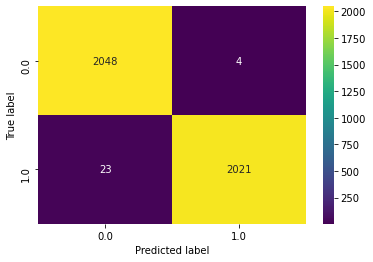

In [22]:
cm = confusion_matrix(y_train, y_pred_train)
make_confusion_matrix(
    cm,
    cmap='viridis',
    categories=classes,
    sum_stats=False,
    percent=False,
)
plt.show()

### 8.1.2. Scoring

In [23]:
report = classification_report(y_train, y_pred_train, output_dict=True)

In [24]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0.0,0.988894,0.998051,0.993451,2052.000000
1.0,0.998025,0.988748,0.993364,2044.000000
accuracy,0.993408,0.993408,0.993408,0.993408
macro avg,0.993459,0.993399,0.993408,4096.000000
weighted avg,0.993451,0.993408,0.993408,4096.000000


## 8.2. Test Set

### 8.2.1. Confusion Matrix

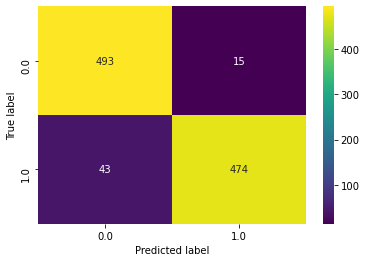

In [25]:
cm = confusion_matrix(y_test, y_pred_test)
make_confusion_matrix(
    cm,
    cmap='viridis',
    categories=classes,
    sum_stats=False,
    percent=False,
)
plt.show()

### 8.2.2. Scoring

In [26]:
report = classification_report(y_test, y_pred_test, output_dict=True)

In [27]:
pd.DataFrame.from_dict(report).T

,precision,recall,f1-score,support
0.0,0.919776,0.970472,0.944444,508.000000
1.0,0.969325,0.916828,0.942346,517.000000
accuracy,0.943415,0.943415,0.943415,0.943415
macro avg,0.944551,0.943650,0.943395,1025.000000
weighted avg,0.944768,0.943415,0.943386,1025.000000


# 9. Save Model

In [28]:
clf.save_model('alzheimer_model')

INFO:tensorflow:Assets written to: alzheimer_model/assets


In [29]:
import pickle

In [30]:
pickle.dump((scaler), open('alzheimer_env.pickle', 'wb'))